In [12]:
using RDatasets
using DataFrames
using Flux 

iris = RDatasets.dataset("datasets", "iris")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


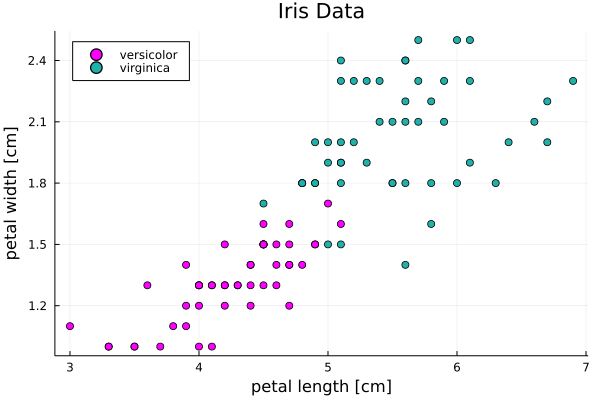

In [13]:
Plots.scatter(iris[51:150, :PetalLength],
            iris[51:150, :PetalWidth],
            xlabel = "petal length [cm]",
            ylabel = "petal width [cm]",
            group = iris[51:150, :Species],
            color = [:magenta :lightseagreen],
            title = "Iris Data",
            legend = :topleft)

---

## Logistic Regression Single Neuron with Multiple Inputs
Thus far we have only used a single feature measurement as input into our single neuron model, but what happens when we use *multiple measurements*. For example, we could use petal length and petal width. With two inputs our model can be depicted by the figure below.

### The Logistic Single Neuron Model with Multiple Feature Inputs


<p align="center">
    <img src="multi_logistic_neuron.png" width="500">
</p>

We can format our data and create a single neuron model matching this figure with the following code.
```julia
X = Matrix(iris[51:150, [:PetalLength, :PetalWidth]])
X = X' # Note the dimensions

y = iris[51:150, :Species]
y = [flower == "versicolor" ? 0 : 1 for flower in y]
y = y'

model = Dense(2, 1, Flux.σ)

loss(x, y) = Flux.Losses.binarycrossentropy(model(x), y)

# Define gradient descent optimizer
opt = Flux.Descent()

# Format your Data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)
```


---

In [33]:
X = Matrix(iris[51:150, [:PetalLength, :PetalWidth]])
println("Old shape $(size(X))")
X = X' # Note the dimensions
println("New shape $(size(X))")

y = iris[51:150, :Species]
y = [flower == "versicolor" ? 0 : 1 for flower in y]
y = y'

# Define 2 input 1 output neuron
model = Flux.Dense(2, 1, Flux.σ)
# model = Flux.Chain(
#                     Dense(2, 40, Flux.σ),
#                     Dense(40, 40, Flux.σ),
#                     Dense(40, 1),
#                     Flux.softmax,
#                 )

# Define binary cross entropy loss
loss(x, y) = Flux.Losses.binarycrossentropy(model(x), y)

# Define gradient descent optimizer
opt = Flux.Descent(0.012)

# Format your data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

Old shape (100, 2)
New shape (2, 100)


Params([Float32[0.6448668 -0.9213089], Float32[0.0]])

---

We can view the linear seperator generated by observing the theoretical formulation of the **pre-activation** and **post-activation* values of a single artifical neuron. 

### Preactivation 
$$
z = w_1 x_1 + w_2 x_2 + b
$$

### Postactivation 
$$
a = \sigma(z)
$$

$$
x_2 = -(w_1 x_1 +b)/w_2
$$

---

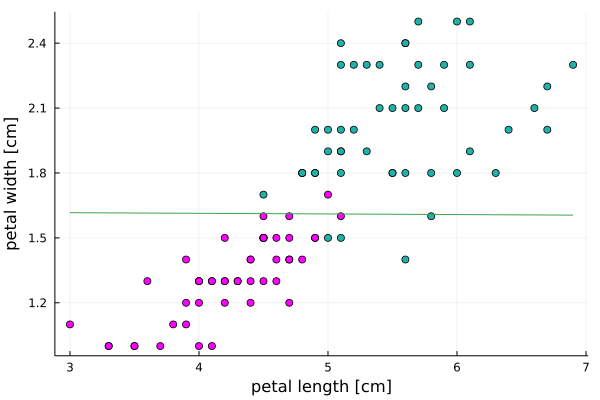

In [34]:

scatter(iris[51:end, :PetalLength], 
        iris[51:end, :PetalWidth], 
        xlabel = "petal length [cm]",
        ylabel = "petal width [cm]", 
        group = iris[51:end, :Species], 
        color = [:magenta :lightseagreen],
        legend = false)

for epoch in 1:9_000
    Flux.train!(loss, parameters, data, opt)
end

(w, b) = params(model)
domain = LinRange(minimum(iris[51:end, :PetalLength]),
                  maximum(iris[51:end, :PetalLength]), 100)
plot!(domain, [-(w[1]*x + b[1])/w[2] for x in domain], legend = false)